In [1]:
import pandas as pd
import numpy as np

### There are three ways to evaluate Scikit-Learn Models:
1. Estimator's built in `score()` method
2. The `scoring` parameter
3. Problem specific metric functions

In [2]:
heart_disease = pd.read_csv("../Data/heart-disease.csv")

In [3]:
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
np.random.seed(42)

X = heart_disease.drop(columns='target')
y = heart_disease['target']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()

model.fit(X_train, y_train)

RandomForestClassifier()

### 1. The Score() method

In [5]:
print(f"The training score is: {model.score(X_train, y_train)}")
print(f"The test score is: {model.score(X_test, y_test)}")

The training score is: 1.0
The test score is: 0.8241758241758241


### 2. The scoring parameter (cross validation)

In [6]:
from sklearn.model_selection import cross_val_score

print(f"Cross_val score: {cross_val_score(model, X, y)}")

# The cross value score trains the model five times in five different train/test splits and evaluates the score for each split. 

Cross_val score: [0.81967213 0.86885246 0.81967213 0.78333333 0.76666667]


### 3. Problem specific evaluations.

**Area under ROC curve.**
* ROC curves are a comparison of a model's true positive rate (tpr) vs. a model's false positive rate (fpr).
* True positive: Model predicts 1 when the truth is 1.
* False positive: Model predicts 1 when the truth is 0. 
* True negative: Model predicts 0 when truth is 0.
* False negative: Model predicts 0 when truth is 1. 

In [7]:
from sklearn.metrics import roc_curve

y_probs = model.predict_proba(X_test)
y_probs[:10]

array([[0.91, 0.09],
       [0.42, 0.58],
       [0.43, 0.57],
       [0.93, 0.07],
       [0.26, 0.74],
       [0.19, 0.81],
       [0.25, 0.75],
       [0.96, 0.04],
       [0.95, 0.05],
       [0.51, 0.49]])

In [8]:
y_probs_positive = y_probs[:, 1]
y_probs_positive[:10]

array([0.09, 0.58, 0.57, 0.07, 0.74, 0.81, 0.75, 0.04, 0.05, 0.49])

In [9]:
fpr, tpr, thresholds = roc_curve(y_test, y_probs_positive)

In [10]:
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.02439024,
       0.02439024, 0.04878049, 0.04878049, 0.04878049, 0.04878049,
       0.04878049, 0.07317073, 0.09756098, 0.09756098, 0.09756098,
       0.14634146, 0.17073171, 0.17073171, 0.19512195, 0.19512195,
       0.2195122 , 0.2195122 , 0.24390244, 0.24390244, 0.26829268,
       0.26829268, 0.34146341, 0.3902439 , 0.3902439 , 0.43902439,
       0.51219512, 0.53658537, 0.63414634, 0.70731707, 0.75609756,
       0.80487805, 0.95121951, 1.        ])

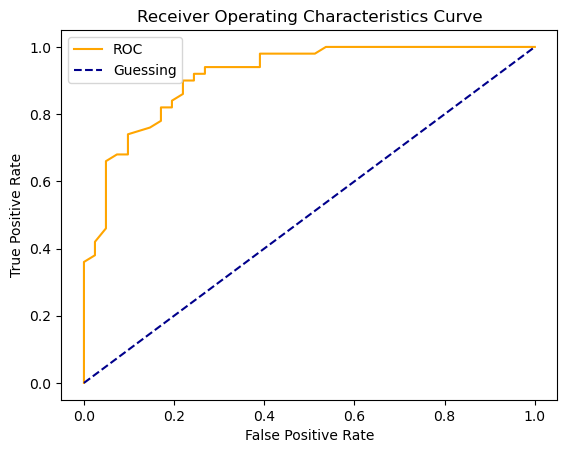

In [11]:
import matplotlib.pyplot as plt

def plot_roc_curve(fpr, tpr):
    """
    Plots a ROC curve given the false positive rate (fpr) and true positive rate (tpr) of model. 
    """
    plt.plot(fpr,tpr, color='orange', label='ROC')
    plt.plot([0,1], [0,1], color='darkblue', linestyle='--', label='Guessing')
    
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("Receiver Operating Characteristics Curve")
    plt.legend()
    plt.show()
    
plot_roc_curve(fpr,tpr)

In [12]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_probs_positive)

0.9148780487804877

**Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the labels it was supposed to predict. 

In essence, it gives an idea of where the model is getting confused.

In [13]:
from sklearn.metrics import confusion_matrix

In [14]:
y_preds = model.predict(X_test)

confusion_matrix(y_test, y_preds)

array([[33,  8],
       [ 8, 42]], dtype=int64)

In [15]:
pd.crosstab(y_test,
            y_preds,
            rownames=['Actual Labels'],
            colnames=['Predicted Labels'])

Predicted Labels,0,1
Actual Labels,,
0,33,8
1,8,42


In [16]:
import seaborn as sns

<Axes: >

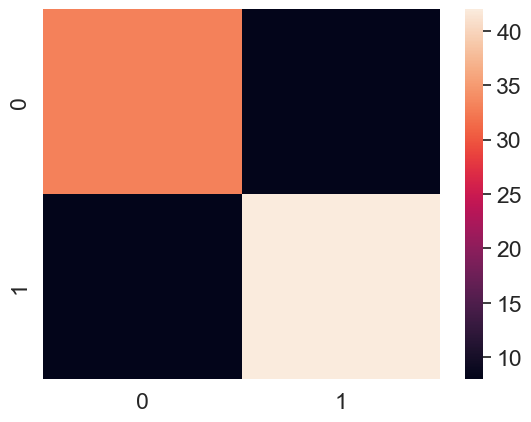

In [17]:
sns.set(font_scale=1.5)

conf_mat = confusion_matrix(y_test, y_preds)

sns.heatmap(conf_mat)

### Creating a confusion matrix using Scikit-Learn

In [18]:
from sklearn.metrics import ConfusionMatrixDisplay

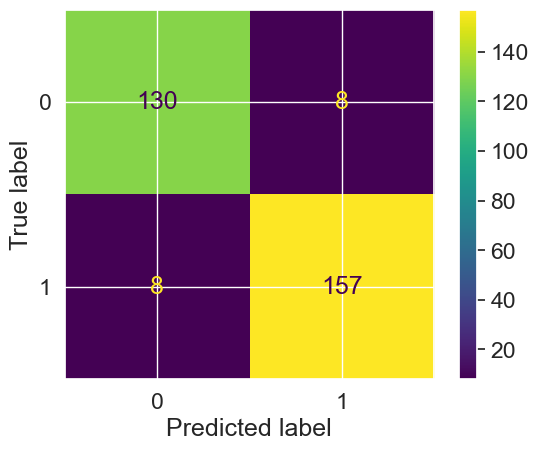

In [19]:
ConfusionMatrixDisplay.from_estimator(estimator=model, X=X, y=y)

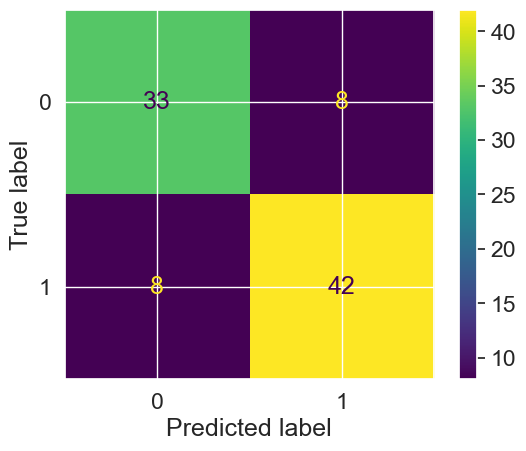

In [21]:
ConfusionMatrixDisplay.from_predictions(y_true=y_test, y_pred=y_preds)

### Classification Report

In [23]:
from sklearn.metrics import classification_report

In [24]:
print(classification_report(y_test, y_preds))

              precision    recall  f1-score   support

           0       0.80      0.80      0.80        41
           1       0.84      0.84      0.84        50

    accuracy                           0.82        91
   macro avg       0.82      0.82      0.82        91
weighted avg       0.82      0.82      0.82        91



In [27]:
disease_true = np.zeros(10000)
disease_true[0] = 1

disease_preds = np.zeros(10000)

pd.DataFrame(classification_report(disease_true, disease_preds, output_dict=True))

c:\Users\kgordon\AppData\Local\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kgordon\AppData\Local\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\kgordon\AppData\Local\anaconda3\envs\MLEnv\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier

,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


### Regression model evaluation metrics
Documentation - https://scikit-learn.org/stable/modules/model_evaluation.html

1. R^2
2. Mean absolute error
3. Mean squared error

### R^2

In [29]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()
housing_df = pd.DataFrame(housing['data'], columns=housing['feature_names'])

In [31]:
housing_df['target'] = housing['target']

In [32]:
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,target
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [33]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = housing_df.drop(columns='target')
y = housing_df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)


In [34]:
model = RandomForestRegressor()

In [35]:
model.fit(X_train, y_train)

RandomForestRegressor()

In [36]:
model.score(X_test, y_test)

0.8058066189927485

In [41]:
y_preds = model.predict(X_test)

In [40]:
from sklearn.metrics import r2_score

In [42]:
r2_score(y_true=y_test, y_pred=y_preds)

0.8058066189927485

### MAE

In [43]:
from sklearn.metrics import mean_absolute_error

In [45]:
mae = mean_absolute_error(y_true=y_test, y_pred=y_preds)
mae

0.3309439194605945

In [46]:
# On average, our predictions are +- 0.33 from the actual values.

### MSE

In [47]:
from sklearn.metrics import mean_squared_error

In [48]:
mean_squared_error(y_true=y_test, y_pred=y_preds)

0.2548866012439965

In [49]:
# The mean of the square of the errors between actual and predicted values is 0.25488

## Which regression metric should you use?
* R^2 is similar to accuracy. It gives you a quick indication of how well your model might be doing. Generally, the closer your R^2 value is to 1.0, the better the model. It doesn't really tell you how wrong your model is in terms of how far each prediction is.
* MAE gives a better indication of how far off each of your model's predictions are on average.
* As for MAE or MSE, because of the way MSE is calculated, squaring the differences between predicted values and actual values, it amplifies larger differences. Let's say we are predicting the value of houses:
    * Pay more attention to MAE when being $10,000 off is twice as bad as being $5,000 off.
    * Pay more attention to MSE when being $10,000 off is much more than twice as bad as being $5,000 off.